In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier
# from sklearn.model_selection import KFold, train_test_split
# from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split, cross_val_score

# from sklearn.svm import SVC

# from sklearn import svm
# from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle
import scipy.stats as stats

# from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines.plotting import add_at_risk_counts
import seaborn as sns


In [2]:
mrna_df =pd.read_csv('/Users/cp/Desktop/Capstone2b/capstone2.mrn_df2.csv')
df = pd.read_csv('/Users/cp/data/METABRIC_RNA_Mutation.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df.replace(death_from_dict, inplace =True)

In [4]:
df.death_from_cancer

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1899    0.0
1900    1.0
1901    1.0
1902    0.0
1903    0.0
Name: death_from_cancer, Length: 1904, dtype: float64

In [5]:
mrna_df['death_from_cancer'] = df.death_from_cancer

In [6]:
mrna_df.death_from_cancer.fillna(0, inplace = True)

In [7]:
mrna_df.shape

(1904, 490)

In [8]:
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mrna_df

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,death_from_cancer
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,0.0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,0.0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,1.0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,0.0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,1.3822,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540,0.0
1900,0.1343,0.9128,1.3017,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863,1.0
1901,1.8107,-0.2608,0.4006,-0.2985,0.0356,-0.1620,1.5486,1.5309,-1.3653,-0.2529,...,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264,1.0
1902,-1.2746,-1.7695,-0.3454,-0.3850,0.6689,1.4531,1.0956,-0.0948,-0.6188,-1.9467,...,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041,0.0


In [10]:
df.cancer_type_detailed.value_counts()

Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: cancer_type_detailed, dtype: int64

In [11]:
for col in df.columns:
    print(col)

patient_id
age_at_diagnosis
type_of_breast_surgery
cancer_type
cancer_type_detailed
cellularity
chemotherapy
pam50_+_claudin-low_subtype
cohort
er_status_measured_by_ihc
er_status
neoplasm_histologic_grade
her2_status_measured_by_snp6
her2_status
tumor_other_histologic_subtype
hormone_therapy
inferred_menopausal_state
integrative_cluster
primary_tumor_laterality
lymph_nodes_examined_positive
mutation_count
nottingham_prognostic_index
oncotree_code
overall_survival_months
overall_survival
pr_status
radio_therapy
3-gene_classifier_subtype
tumor_size
tumor_stage
death_from_cancer
brca1
brca2
palb2
pten
tp53
atm
cdh1
chek2
nbn
nf1
stk11
bard1
mlh1
msh2
msh6
pms2
epcam
rad51c
rad51d
rad50
rb1
rbl1
rbl2
ccna1
ccnb1
cdk1
ccne1
cdk2
cdc25a
ccnd1
cdk4
cdk6
ccnd2
cdkn2a
cdkn2b
myc
cdkn1a
cdkn1b
e2f1
e2f2
e2f3
e2f4
e2f5
e2f6
e2f7
e2f8
src
jak1
jak2
stat1
stat2
stat3
stat5a
stat5b
mdm2
tp53bp1
adam10
adam17
aph1a
aph1b
arrdc1
cir1
ctbp1
ctbp2
cul1
dll1
dll3
dll4
dtx1
dtx2
dtx3
dtx4
ep300
fbxw7
hda

In [12]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 693 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    patient_id                      int64  
 1    age_at_diagnosis                float64
 2    type_of_breast_surgery          object 
 3    cancer_type                     object 
 4    cancer_type_detailed            object 
 5    cellularity                     object 
 6    chemotherapy                    int64  
 7    pam50_+_claudin-low_subtype     object 
 8    cohort                          float64
 9    er_status_measured_by_ihc       object 
 10   er_status                       object 
 11   neoplasm_histologic_grade       float64
 12   her2_status_measured_by_snp6    object 
 13   her2_status                     object 
 14   tumor_other_histologic_subtype  object 
 15   hormone_therapy                 int64  
 16   inferred_menopausal_state       object 
 17   integrative_

In [13]:
df.shape

(1904, 693)

In [14]:
df.type_of_breast_surgery.value_counts()

MASTECTOMY           1127
BREAST CONSERVING     755
Name: type_of_breast_surgery, dtype: int64

In [15]:
# mrna_df.to_csv(r'/Users/cp/data/mrna_tableau.csv', index = False)

In [16]:
mast_df = df[df['type_of_breast_surgery'] == 'MASTECTOMY']

In [17]:
df.type_of_breast_surgery.isna().sum()

22

In [18]:
# df[df['type_of_breast_surgery'] == 'MASTECTOMY']
mast_df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,7293,56.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1898,7294,59.20,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [19]:
chemo_df =  df[df['chemotherapy']==1]
non_chem_df = df[df['chemotherapy']==0]
chemo_treatment =  chemo_df.overall_survival_months
non_chemo_treatment =  non_chem_df.overall_survival_months

stats.ttest_ind(a= chemo_treatment,
                b= non_chemo_treatment,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-7.22937562935596, pvalue=1.393376395037141e-12)

In [20]:
print(chemo_treatment.mean())
print(chemo_treatment.std())
print(non_chemo_treatment.mean())
print(non_chemo_treatment.std())
print(chemo_df.shape)
print(non_chem_df.shape)

101.30109427648982
73.06304555644657
131.37650309429517
75.96452053308678
(396, 693)
(1508, 693)


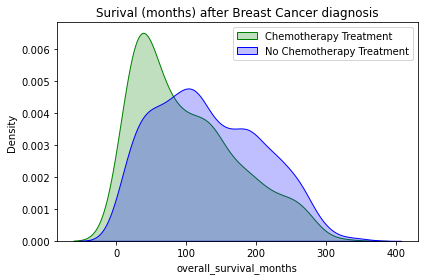

In [21]:
x = chemo_treatment
y = non_chemo_treatment
sns.kdeplot(x, color="green", shade=True, label = 'Chemotherapy Treatment')
sns.kdeplot(y, color="blue", shade=True, label = 'No Chemotherapy Treatment').set_title('Surival (months) after Breast Cancer diagnosis')
plt.legend()
# ax.suptitle(f"Binomial Distributions of Null Hypotheses")
# ax.set_title('Surival months after diagnosis')
# plt.savefig('KDE_chemotherapy.png', dpi =300)
# plt.set((title='Points by Team')
plt.tight_layout()
plt.show()

In [22]:
chemo_df['overall_survival_months'].dropna(inplace = True)
chemo_df.shape

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


(396, 693)

In [23]:
non_chemo_treatment.head()

0    140.500000
1     84.633333
5      7.800000
7     99.533333
8     36.566667
Name: overall_survival_months, dtype: float64

In [24]:
non_chem_df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [25]:
non_chem_df['overall_survival_months'].dropna(inplace = True)
non_chem_df.shape

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


(1508, 693)

In [26]:
non_chem_df.overall_survival_months.isna().sum()

0

In [27]:
chemo_df.overall_survival_months.isna().sum()

0

In [28]:
non_chem_df.death_from_cancer.fillna(0, inplace = True)

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [29]:
chemo_df.death_from_cancer.isna().sum()

0

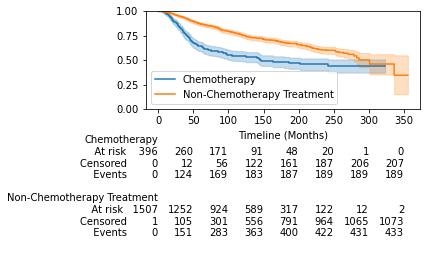

In [30]:
kmf_mast = KaplanMeierFitter()
kmf_mast.fit(chemo_df.overall_survival_months, event_observed=chemo_df['death_from_cancer'], label = 'Chemotherapy')
ax = kmf_mast.plot()

# kmf_mast.fit(mast_df.overall_survival_months, event_observed=mast_df['death_from_cancer']).plot_survival_function(ax=ax)
# plt.tight_layout()
# plt.show()


kmf_conserv = KaplanMeierFitter()
kmf_conserv.fit(non_chem_df.overall_survival_months, event_observed=non_chem_df['death_from_cancer'], label = 'Non-Chemotherapy Treatment')
ax = kmf_conserv.plot(ax=ax)
add_at_risk_counts(kmf_mast, kmf_conserv, ax=ax)

ax.set_ylim([0.0, 1.0])
# plt.xlabel('Timeline (months)')
ax.set_xlabel('Timeline (Months)')
# plt.figure(dpi=250)
plt.tight_layout()
# plt.savefig('surivival_chemotherapy.png', dpi = 300)

In [31]:
breast_conserving_df = df[df['type_of_breast_surgery']=='BREAST CONSERVING']

In [32]:
breast_conserving_df.shape

(755, 693)

In [33]:
 breast_conserving_df.overall_survival.value_counts()

1    404
0    351
Name: overall_survival, dtype: int64

In [34]:
print(breast_conserving_df.overall_survival_months.mean())
print(breast_conserving_df.age_at_diagnosis.mean())
print(breast_conserving_df.age_at_diagnosis.std())

134.76110375214571
59.17732450331109
12.092589450679066


In [35]:
 breast_conserving_df.overall_survival_months.std()

73.93220294210701

In [36]:
print(mast_df.overall_survival_months.mean())
print(mast_df.age_at_diagnosis.mean())
print(mast_df.age_at_diagnosis.std())

119.7950014789504
62.46583850931672
13.371033064299088


In [37]:
 mast_df.overall_survival_months.std()

76.86521507419802

In [38]:
mast_df.overall_survival.value_counts()

0    738
1    389
Name: overall_survival, dtype: int64

In [39]:
breast_conserve_treatment =  breast_conserving_df.overall_survival_months
mascectomy_treatment =  mast_df.overall_survival_months

In [40]:
breast_conserve_treatment.mean()

134.76110375214571

In [41]:
mascectomy_treatment.mean()

119.7950014789504

In [42]:
breast_conserve_treatment.std()

73.93220294210701

In [43]:
mascectomy_treatment.std()

76.86521507419802

In [44]:
mascectomy_treatment.shape

(1127,)

In [45]:
breast_conserve_treatment.shape

(755,)

In [46]:
# stats.ttest_rel(a = breast_conserve_treatment,
#                 b = mascectomy_treatment)
stats.ttest_ind(a= breast_conserve_treatment,
                b= mascectomy_treatment,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=4.23607621528033, pvalue=2.3994948261799636e-05)

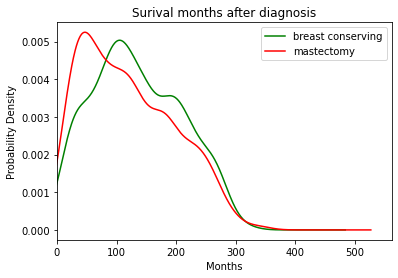

In [47]:
ax = breast_conserve_treatment.plot(kind='density', color='g', label = 'breast conserving')
mascectomy_treatment.plot(kind='density', color='red', label = 'mastectomy')
ax.set(xlabel='Months')
ax.set_title('Surival months after diagnosis')
ax.plot(figsize = (12,12))
ax.set_ylabel('Probability Density')
plt.xlim(0)
plt.legend()
# plt.savefig("probability_density_cancer_death_non_cancer_death.png")
plt.show()

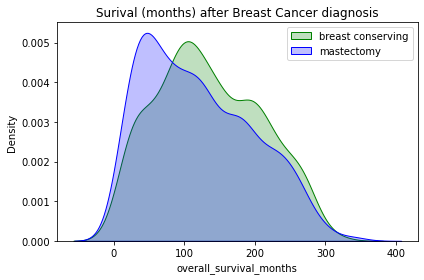

In [48]:
x = breast_conserve_treatment
y = mascectomy_treatment
sns.kdeplot(x, color="green", shade=True, label = 'breast conserving')
sns.kdeplot(y, color="blue", shade=True, label = 'mastectomy').set_title('Surival (months) after Breast Cancer diagnosis')
plt.legend()
# ax.suptitle(f"Binomial Distributions of Null Hypotheses")
# ax.set_title('Surival months after diagnosis')
# plt.savefig('KDE_mastectomy.png', dpi = 300)
# plt.set((title='Points by Team')
plt.tight_layout()
plt.show()

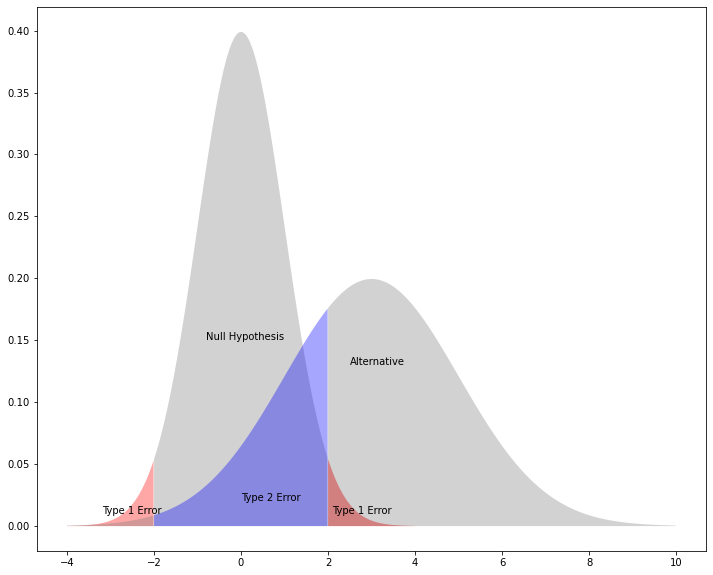

In [49]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

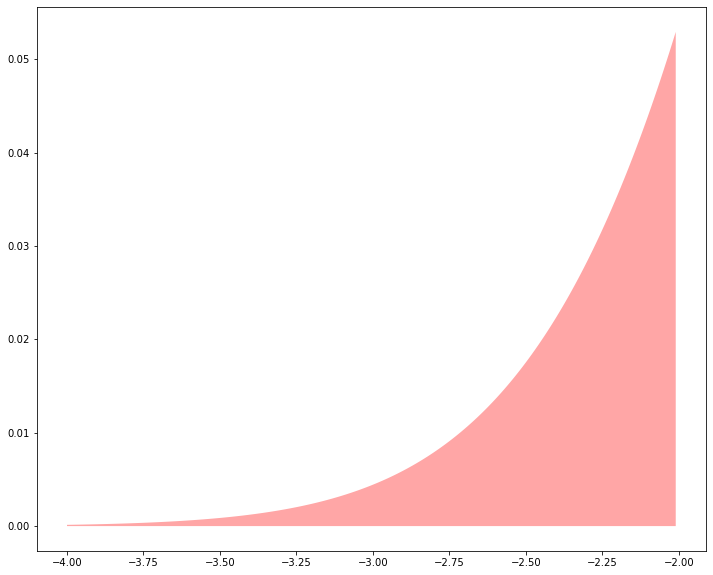

In [50]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)





In [51]:
mast_df.shape
breast_conserving_df.shape

(755, 693)

In [52]:
# mast_df['death_from_cancer']

In [53]:
breast_conserving_df['death_from_cancer'].isnull().sum()

1

In [54]:
nan_row = breast_conserving_df[breast_conserving_df['death_from_cancer'].isnull()]
# breast_conserving_df['death_from_cancer'].fillna(0)
nan_row['overall_survival_months']

1166    255.0
Name: overall_survival_months, dtype: float64

In [55]:
nan_row

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1166,5130,58.61,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,0,LumA,3.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# breast_conserving_df[breast_conserving_df['death_from_cancer'].isnull()]

In [57]:
breast_conserving_df['death_from_cancer'].fillna(0, inplace = True)

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


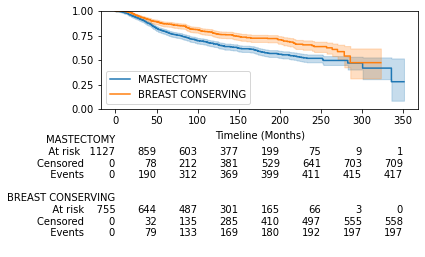

In [58]:
kmf_mast = KaplanMeierFitter()
kmf_mast.fit(mast_df.overall_survival_months, event_observed=mast_df['death_from_cancer'], label = 'MASTECTOMY')
ax = kmf_mast.plot()

# kmf_mast.fit(mast_df.overall_survival_months, event_observed=mast_df['death_from_cancer']).plot_survival_function(ax=ax)
# plt.tight_layout()
# plt.show()


kmf_conserv = KaplanMeierFitter()
kmf_conserv.fit(breast_conserving_df.overall_survival_months, event_observed=breast_conserving_df['death_from_cancer'], label = 'BREAST CONSERVING')
ax = kmf_conserv.plot(ax=ax)
add_at_risk_counts(kmf_mast, kmf_conserv, ax=ax)

ax.set_ylim([0.0, 1.0])
# plt.xlabel('Timeline (months)')
ax.set_xlabel('Timeline (Months)')
# plt.figure(dpi=250)
plt.tight_layout()
plt.savefig('surivival_mastectomy.png', dpi = 300)

In [59]:
kmf.survival_function_
kmf.plot_survival_function()

NameError: name 'kmf' is not defined

<AxesSubplot:xlabel='timeline'>

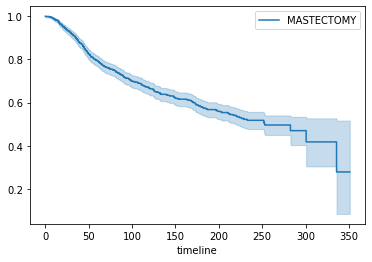

In [60]:
kmf_mast.plot_survival_function()

In [61]:
# kmf_conserv = KaplanMeierFitter()
# kmf_conserv.fit(breast_conserving_df.overall_survival_months, event_observed=breast_conserving_df['death_from_cancer'])

In [62]:
# kmf_conserv.plot_survival_function()

In [63]:
df.death_from_cancer.isna().sum()

1

In [64]:
mrna_df.death_from_cancer.isna().sum()

0

In [65]:
df[df['death_from_cancer'].isnull()]

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1166,5130,58.61,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,0,LumA,3.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df.her2_status.value_counts()

Negative    1668
Positive     236
Name: her2_status, dtype: int64

In [67]:
death_df = df[df['death_from_cancer'] ==1]

In [68]:
death_df.shape

(622, 693)

In [69]:
death_df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,0,0,0,0,0,0,0,0,0,0
10,36,85.49,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [70]:
mutations_df = death_df.iloc[:,520:]

In [71]:
mutations_df.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,H1047R,P67Qfs*56,0,0,0,0,A318T,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,H1047R,0,0,0,M1974Ifs*32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,P6040R,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
mutations_df.shape

(622, 173)

In [73]:
# mutations_df.astype(bool).sum(axis=0)

In [74]:
# mutations_df.fillna(0).astype(bool).sum(axis=1)

In [75]:
mutations_df.pik3ca_mut.value_counts()

0                        358
H1047R                    93
E545K                     41
E542K                     22
N345K                     16
                        ... 
P471_C472insML             1
K724del                    1
L113Sfs*32 K111Dfs*16      1
E81K D1017H                1
W11C                       1
Name: pik3ca_mut, Length: 71, dtype: int64

In [76]:
mutations_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 2 to 1901
Data columns (total 173 columns):
 #    Column         Dtype 
---   ------         ----- 
 0    pik3ca_mut     object
 1    tp53_mut       object
 2    muc16_mut      object
 3    ahnak2_mut     object
 4    kmt2c_mut      object
 5    syne1_mut      object
 6    gata3_mut      object
 7    map3k1_mut     object
 8    ahnak_mut      object
 9    dnah11_mut     object
 10   cdh1_mut       object
 11   dnah2_mut      object
 12   kmt2d_mut      object
 13   ush2a_mut      object
 14   ryr2_mut       object
 15   dnah5_mut      object
 16   herc2_mut      object
 17   pde4dip_mut    object
 18   akap9_mut      object
 19   tg_mut         object
 20   birc6_mut      object
 21   utrn_mut       object
 22   tbx3_mut       object
 23   col6a3_mut     object
 24   arid1a_mut     object
 25   lama2_mut      object
 26   notch1_mut     object
 27   cbfb_mut       object
 28   ncor2_mut      object
 29   col12a1_mut    obje

In [77]:
# death_mut_df = mutations_df.map(lambda x: 0 if x == "0" else 1)

In [78]:
# mutations_df[mutations_df['pik3ca_mut']=='0']

In [96]:
death_mutation_dict ={}

for col in mutations_df.columns:
    mutations_df[col].replace({0:'0'}, inplace = True)
    print(col)
    print((mutations_df[col].str.startswith('0')).sum())
    death_mutation_dict[col] = (mutations_df[col].str.startswith('0')).sum()
    
    

pik3ca_mut
358
tp53_mut
342
muc16_mut
502
ahnak2_mut
525
kmt2c_mut
544
syne1_mut
546
gata3_mut
579
map3k1_mut
573
ahnak_mut
562
dnah11_mut
562
cdh1_mut
561
dnah2_mut
568
kmt2d_mut
571
ush2a_mut
566
ryr2_mut
580
dnah5_mut
580
herc2_mut
576
pde4dip_mut
581
akap9_mut
585
tg_mut
585
birc6_mut
580
utrn_mut
593
tbx3_mut
597
col6a3_mut
591
arid1a_mut
584
lama2_mut
595
notch1_mut
593
cbfb_mut
601
ncor2_mut
603
col12a1_mut
594
col22a1_mut
593
pten_mut
599
akt1_mut
596
atr_mut
592
thada_mut
597
ncor1_mut
597
stab2_mut
594
myh9_mut
595
runx1_mut
603
nf1_mut
599
map2k4_mut
599
ros1_mut
602
lamb3_mut
601
arid1b_mut
601
erbb2_mut
602
sf3b1_mut
600
shank2_mut
604
ep300_mut
600
ptprd_mut
607
usp9x_mut
604
setd2_mut
601
setd1a_mut
604
thsd7a_mut
596
afdn_mut
605
erbb3_mut
604
rb1_mut
603
myo1a_mut
605
alk_mut
610
fanca_mut
601
adgra2_mut
605
ubr5_mut
603
pik3r1_mut
612
myo3a_mut
601
asxl2_mut
602
apc_mut
614
ctcf_mut
610
asxl1_mut
612
fancd2_mut
606
taf1_mut
607
kdm6a_mut
611
ctnna3_mut
609
brca1_mut
6

In [97]:
death_mutation_dict

{'pik3ca_mut': 358,
 'tp53_mut': 342,
 'muc16_mut': 502,
 'ahnak2_mut': 525,
 'kmt2c_mut': 544,
 'syne1_mut': 546,
 'gata3_mut': 579,
 'map3k1_mut': 573,
 'ahnak_mut': 562,
 'dnah11_mut': 562,
 'cdh1_mut': 561,
 'dnah2_mut': 568,
 'kmt2d_mut': 571,
 'ush2a_mut': 566,
 'ryr2_mut': 580,
 'dnah5_mut': 580,
 'herc2_mut': 576,
 'pde4dip_mut': 581,
 'akap9_mut': 585,
 'tg_mut': 585,
 'birc6_mut': 580,
 'utrn_mut': 593,
 'tbx3_mut': 597,
 'col6a3_mut': 591,
 'arid1a_mut': 584,
 'lama2_mut': 595,
 'notch1_mut': 593,
 'cbfb_mut': 601,
 'ncor2_mut': 603,
 'col12a1_mut': 594,
 'col22a1_mut': 593,
 'pten_mut': 599,
 'akt1_mut': 596,
 'atr_mut': 592,
 'thada_mut': 597,
 'ncor1_mut': 597,
 'stab2_mut': 594,
 'myh9_mut': 595,
 'runx1_mut': 603,
 'nf1_mut': 599,
 'map2k4_mut': 599,
 'ros1_mut': 602,
 'lamb3_mut': 601,
 'arid1b_mut': 601,
 'erbb2_mut': 602,
 'sf3b1_mut': 600,
 'shank2_mut': 604,
 'ep300_mut': 600,
 'ptprd_mut': 607,
 'usp9x_mut': 604,
 'setd2_mut': 601,
 'setd1a_mut': 604,
 'thsd7a_mut

In [98]:
sorted(death_mutation_dict.items(), key=lambda x: x[1])

[('tp53_mut', 342),
 ('pik3ca_mut', 358),
 ('muc16_mut', 502),
 ('ahnak2_mut', 525),
 ('kmt2c_mut', 544),
 ('syne1_mut', 546),
 ('cdh1_mut', 561),
 ('ahnak_mut', 562),
 ('dnah11_mut', 562),
 ('ush2a_mut', 566),
 ('dnah2_mut', 568),
 ('kmt2d_mut', 571),
 ('map3k1_mut', 573),
 ('herc2_mut', 576),
 ('gata3_mut', 579),
 ('ryr2_mut', 580),
 ('dnah5_mut', 580),
 ('birc6_mut', 580),
 ('pde4dip_mut', 581),
 ('arid1a_mut', 584),
 ('akap9_mut', 585),
 ('tg_mut', 585),
 ('col6a3_mut', 591),
 ('atr_mut', 592),
 ('utrn_mut', 593),
 ('notch1_mut', 593),
 ('col22a1_mut', 593),
 ('col12a1_mut', 594),
 ('stab2_mut', 594),
 ('lama2_mut', 595),
 ('myh9_mut', 595),
 ('akt1_mut', 596),
 ('thsd7a_mut', 596),
 ('tbx3_mut', 597),
 ('thada_mut', 597),
 ('ncor1_mut', 597),
 ('pten_mut', 599),
 ('nf1_mut', 599),
 ('map2k4_mut', 599),
 ('sf3b1_mut', 600),
 ('ep300_mut', 600),
 ('cbfb_mut', 601),
 ('lamb3_mut', 601),
 ('arid1b_mut', 601),
 ('setd2_mut', 601),
 ('fanca_mut', 601),
 ('myo3a_mut', 601),
 ('ros1_mut',

In [99]:
mutations_df.rasgef1b_mut.value_counts()

0        621
V418A      1
Name: rasgef1b_mut, dtype: int64

In [104]:
# for i in mutations_df.rasgef1b_mut:
#     print(i)
#     print(type(i))

In [101]:
mutations_df.hras_mut.value_counts()

0       621
Q61R      1
Name: hras_mut, dtype: int64

In [102]:
mutations_df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 2 to 1901
Data columns (total 173 columns):
 #    Column         Dtype 
---   ------         ----- 
 0    pik3ca_mut     object
 1    tp53_mut       object
 2    muc16_mut      object
 3    ahnak2_mut     object
 4    kmt2c_mut      object
 5    syne1_mut      object
 6    gata3_mut      object
 7    map3k1_mut     object
 8    ahnak_mut      object
 9    dnah11_mut     object
 10   cdh1_mut       object
 11   dnah2_mut      object
 12   kmt2d_mut      object
 13   ush2a_mut      object
 14   ryr2_mut       object
 15   dnah5_mut      object
 16   herc2_mut      object
 17   pde4dip_mut    object
 18   akap9_mut      object
 19   tg_mut         object
 20   birc6_mut      object
 21   utrn_mut       object
 22   tbx3_mut       object
 23   col6a3_mut     object
 24   arid1a_mut     object
 25   lama2_mut      object
 26   notch1_mut     object
 27   cbfb_mut       object
 28   ncor2_mut      object
 29   col12a1_mut    obje

In [87]:
mutations_df.siah1_mut.value_counts()

0        331
0        290
T249A      1
Name: siah1_mut, dtype: int64

In [88]:
mutations_df.tp53_mut.value_counts()

0              342
R175H           10
R248W            8
R213*            7
R306*            7
              ... 
I162Tfs*14       1
N200Ifs*47       1
M246*            1
E180*            1
X331_splice      1
Name: tp53_mut, Length: 189, dtype: int64

In [103]:
mutations_df.pik3ca_mut.value_counts()

0                        358
H1047R                    93
E545K                     41
E542K                     22
N345K                     16
                        ... 
P471_C472insML             1
K724del                    1
L113Sfs*32 K111Dfs*16      1
E81K D1017H                1
W11C                       1
Name: pik3ca_mut, Length: 71, dtype: int64